Opioid Settlement Payouts Data from KFF Health News https://kffhealthnews.org/opioid-settlements/

Data cleaning cheat sheet: https://www.kdnuggets.com/2023/02/data-cleaning-python-cheat-sheet.html

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

In [68]:
# Set pandas display option to format floats with commas
pd.options.display.float_format = '{:,.2f}'.format

In [69]:
# Load the Excel file
file_path = 'Opioid-Settlement-Payouts-Data_040124.xlsx'
xls = pd.ExcelFile(file_path)  #creates an object to hold the information

# Define the sheet(s) to exclude
sheets_to_exclude = ['Terms of Use', 'State-level']  

# List to hold individual DataFrames
dfs = []

# Loop through the sheets
for sheet_name in xls.sheet_names:
    if sheet_name not in sheets_to_exclude:
        # Read each sheet into a DataFrame
        df = pd.read_excel(xls, sheet_name=sheet_name)
        
        # add a column to identify the sheet
        df['Sheet'] = sheet_name
        
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

               beneficiary_name                        county   state  \
0        Anchorage Municipality             Anchorage Borough  Alaska   
1     Matanuska-Susitna Borough     Matanuska-Susitna Borough  Alaska   
2  Fairbanks North Star Borough  Fairbanks North Star Borough  Alaska   
3       Kenai Peninsula Borough       Kenai Peninsula Borough  Alaska   
4       Juneau City And Borough                Juneau Borough  Alaska   

    total_paid  total_estimated  paid_2022  paid_2023   est_2024   est_2025  \
0 1,058,900.29     3,184,346.62 904,994.85 153,905.44 198,789.11 192,634.46   
1   343,782.97     1,033,831.21 293,815.97  49,967.00  64,538.95  62,540.78   
2   243,578.29       732,493.66 208,175.50  35,402.79  45,727.36  44,311.61   
3   210,905.53       634,239.36 180,251.55  30,653.98  39,593.64  38,367.80   
4   116,257.77       349,612.77  99,360.33  16,897.44  21,825.26  21,149.54   

    est_2026  ...   est_2030   est_2031   est_2032   est_2033   est_2034  \
0 222,605.

If including all of the worksheets, remove Alabama and West Virginia
Alabama and West Virginia data contains N/A.  Drop these states.  

In [70]:
#filtered_df = combined_df[~combined_df['name'].isin(['Alabama', 'West Virginia'])]
#print(filtered_df.head())

In [71]:
combined_df.isnull().sum()

beneficiary_name     0
county              40
state                0
total_paid           0
total_estimated      0
paid_2022            0
paid_2023            0
est_2024             0
est_2025             0
est_2026             0
est_2027             0
est_2028             0
est_2029             0
est_2030             0
est_2031             0
est_2032             0
est_2033             0
est_2034             0
est_2035             0
est_2036             0
est_2037             0
est_2038             0
Sheet                0
dtype: int64

In [72]:
combined_df['county'] = combined_df['county'].fillna('None')
combined_df.isnull().sum()


beneficiary_name    0
county              0
state               0
total_paid          0
total_estimated     0
paid_2022           0
paid_2023           0
est_2024            0
est_2025            0
est_2026            0
est_2027            0
est_2028            0
est_2029            0
est_2030            0
est_2031            0
est_2032            0
est_2033            0
est_2034            0
est_2035            0
est_2036            0
est_2037            0
est_2038            0
Sheet               0
dtype: int64

In [73]:
combined_df.duplicated().sum()

0

In [74]:
# Outlier detection - detect  range of values
combined_df.describe([x*0.1 for x in range(10)])      

,total_paid,total_estimated,paid_2022,paid_2023,est_2024,est_2025,est_2026,est_2027,est_2028,est_2029,est_2030,est_2031,est_2032,est_2033,est_2034,est_2035,est_2036,est_2037,est_2038
count,"4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00","4,640.00"
mean,"282,852.54","1,183,020.85","211,783.79","71,068.76","93,829.64","96,456.62","75,599.74","75,599.74","92,676.53","95,464.07","95,470.25","82,377.73","67,906.66","67,908.33","67,908.74","67,908.74","67,908.74","67,955.09","68,050.23"
std,"1,242,546.67","6,147,215.35","887,976.67","379,754.74","524,984.43","545,669.04","388,618.70","388,618.70","478,265.22","493,343.03","493,342.08","426,222.77","349,819.94","349,819.77","349,819.73","349,819.73","349,819.73","350,009.72","350,434.18"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10%,"3,010.62","15,585.65","1,914.26",737.71,"1,111.95","1,128.20","1,045.93","1,045.93","1,232.53","1,271.47","1,271.47","1,094.84",895.85,895.85,895.85,895.85,895.85,895.85,895.85
20%,"9,768.51","45,515.24","6,619.19","2,315.76","3,233.83","3,261.56","2,920.62","2,920.62","3,454.35","3,561.78","3,571.32","3,103.36","2,686.45","2,686.45","2,686.45","2,686.45","2,686.45","2,686.45","2,686.45"
30%,"19,785.36","87,975.73","14,113.46","4,614.17","6,162.31","6,250.62","5,635.84","5,635.84","6,797.82","6,968.39","6,971.15","6,012.81","5,208.60","5,208.60","5,208.60","5,208.60","5,208.60","5,208.60","5,208.60"
40%,"34,460.04","139,771.14","25,473.66","7,386.90","9,801.46","9,986.55","9,054.00","9,054.00","10,979.34","11,314.18","11,322.50","9,767.70","8,163.62","8,163.62","8,163.62","8,163.62","8,163.62","8,163.62","8,163.62"
50%,"53,932.50","211,846.33","40,802.24","11,158.48","14,722.76","14,931.01","13,792.97","13,792.97","16,801.34","17,257.29","17,277.18","14,876.26","12,408.74","12,408.74","12,419.56","12,419.56","12,419.56","12,419.56","12,419.56"


In [75]:
#Rescale the data - convert total paid to millions by divinding by 10 to the power of 6
combined_df['total_paid_millions'] = combined_df['total_paid'] / 1e6


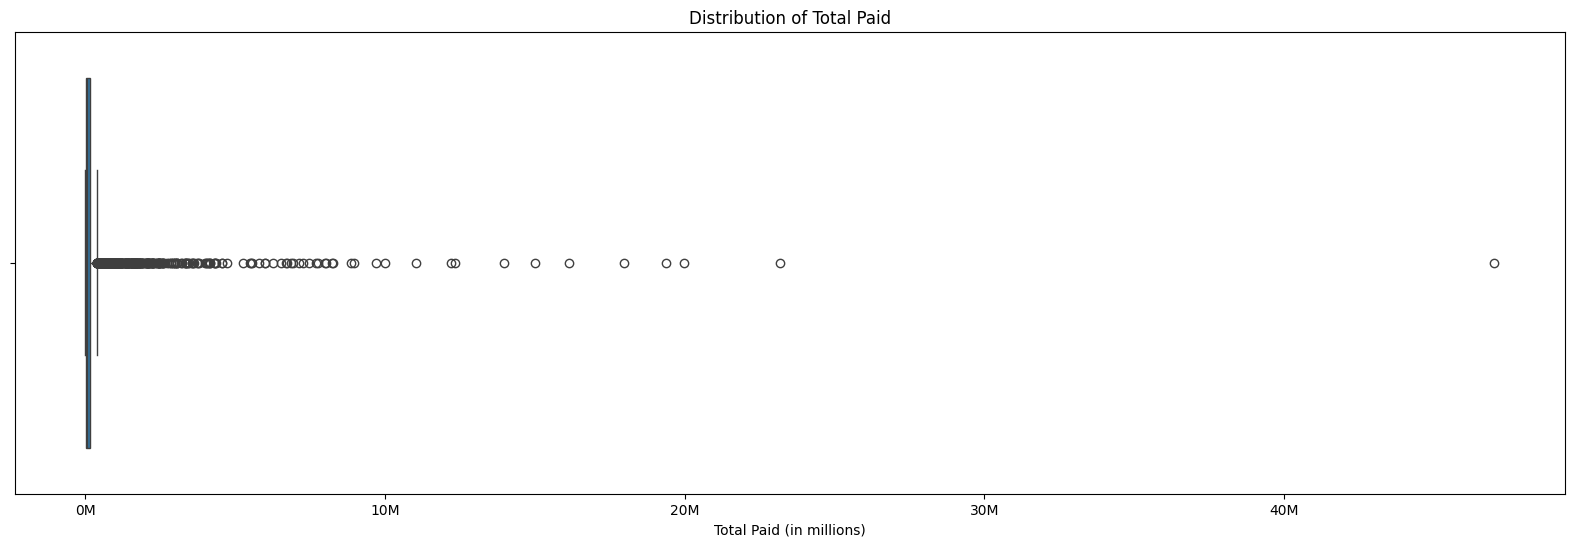

In [77]:

# Function to format x-axis labels as millions
def millions_formatter(x, pos):
    return f'{int(x)}M'


#Boxplot to display distribution of a column
plt.figure(figsize=(20, 6))
sns.boxplot(x=combined_df['total_paid_millions'])

# Format the x-axis labels to show millions
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xlabel('Total Paid (in millions)')
plt.title('Distribution of Total Paid')
plt.show()